Задача 1  
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке

In [18]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt


df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости

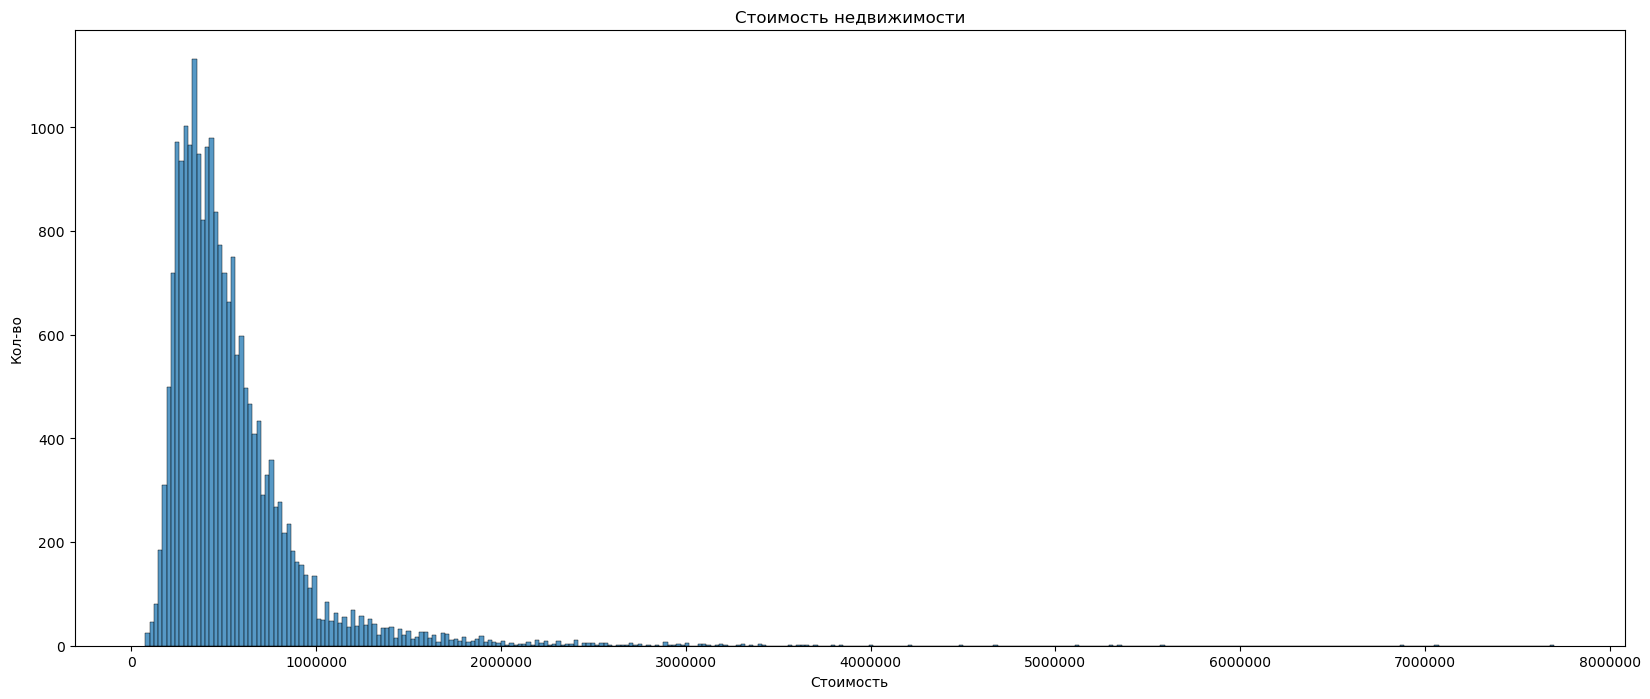

In [19]:
plt.figure(figsize=(20, 8))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Cтоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во')
df['price'].describe();

Вывод: большая часть недвижимости стоит до 1млн

1.3 Изучите распределение квадратуры жилой

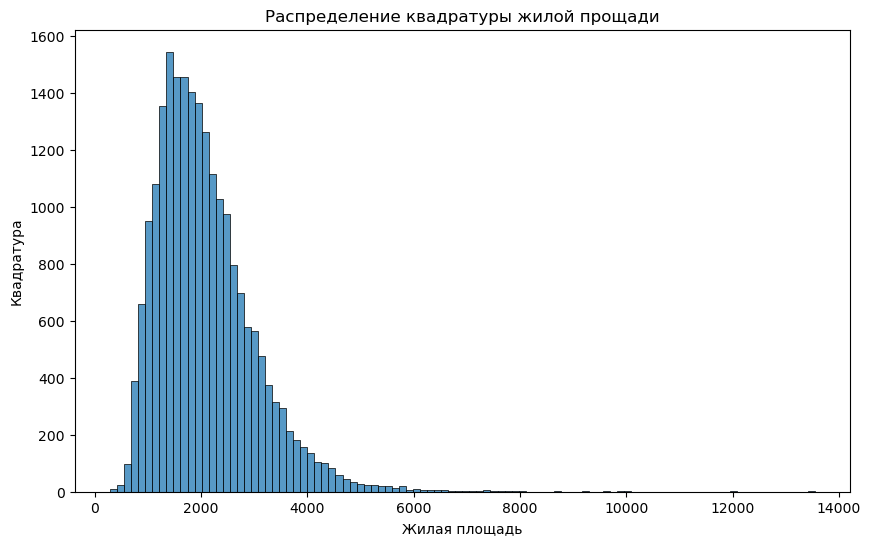

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение квадратуры жилой прощади')
plt.xlabel('Жилая площадь')
plt.ylabel('Квадратура')
df['sqft_living'].describe();

Вывод: Большенство недвижимости имеет площадь от 1000 до 3000 метров

1.4 Изучите распределение года постройки

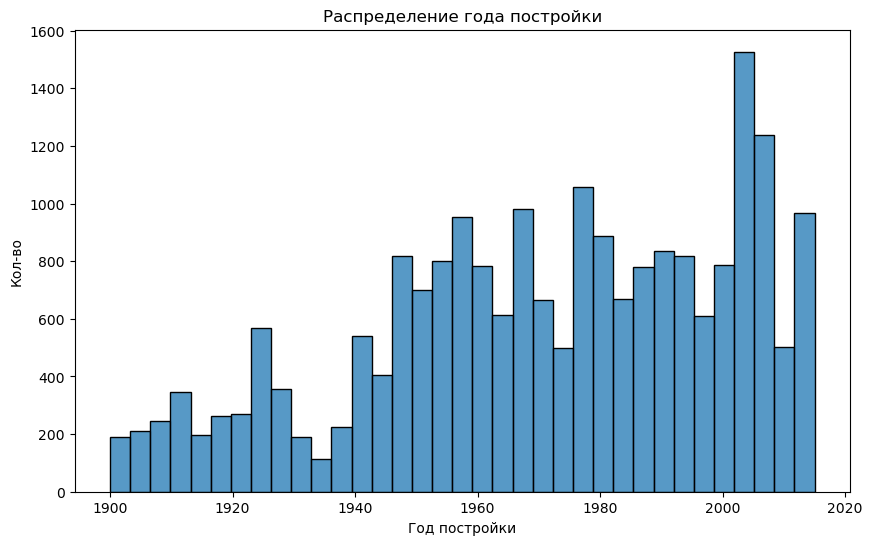

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

По распределению года постройки можно сказать, что с 1950 был прирост строительства, и до 2000г строительство было относительно стабильно,в 2009г был резкий рост.

Задача 2  
Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы  
2.2 Изучите распределение этажей домов

In [22]:
x = df['waterfront'].value_counts()
x.index = ['без вида', 'с вид']
x.head()

без вида    21450
с вид         163
Name: waterfront, dtype: int64

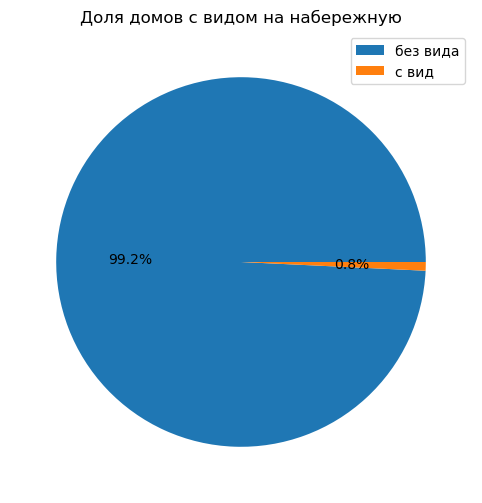

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(x, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(x.index);

2.2 Изучите распределение состояния домов

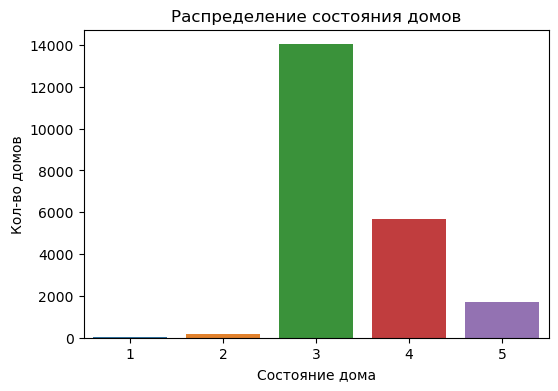

In [26]:
z = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
sea.barplot(x = z.index, y = z)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во домов');



Вывод: больше всего домов в удовлетворительном состоянии

2.3 Изучите распределение этажей домов

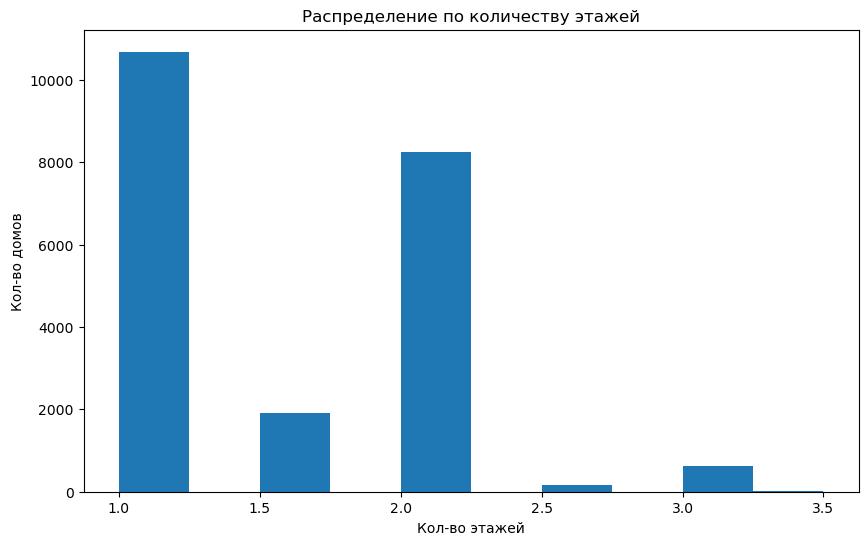

In [31]:
c = df['floors'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(df['floors'])
plt.title('Распределение по количеству этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

Вывод: Преобладают одноэтажные дома

Задача 3  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

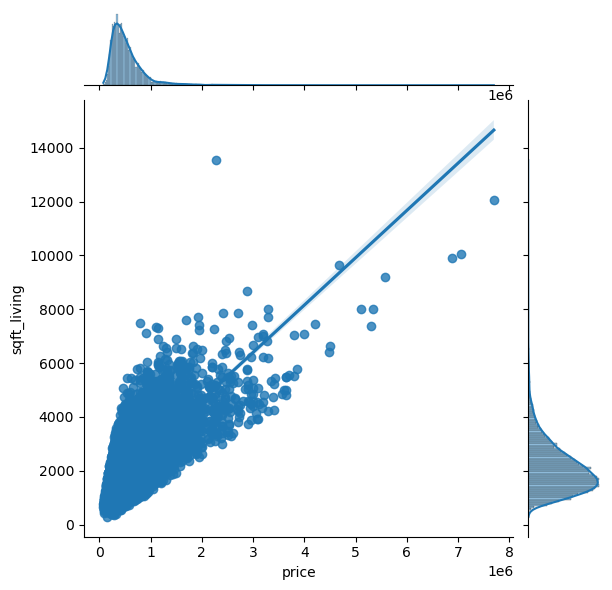

In [37]:
sea.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость')
plt.ylabel('Площадь');

Вывод: чем больше площадь тем больше стоимость

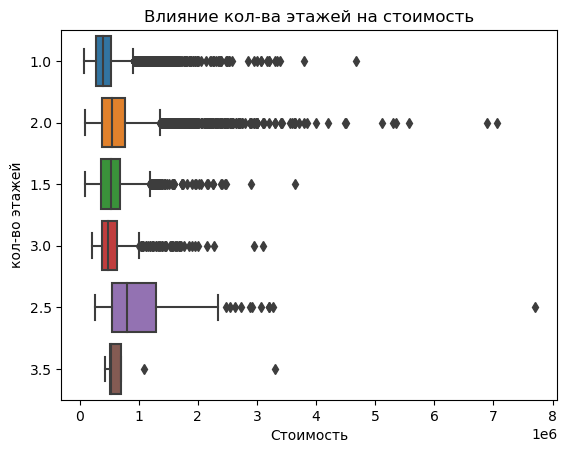

In [36]:
sea.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('кол-во этажей')
plt.title('Влияние кол-ва этажей на стоимость');



Вывод дороже всего дома с 2.5 этажами

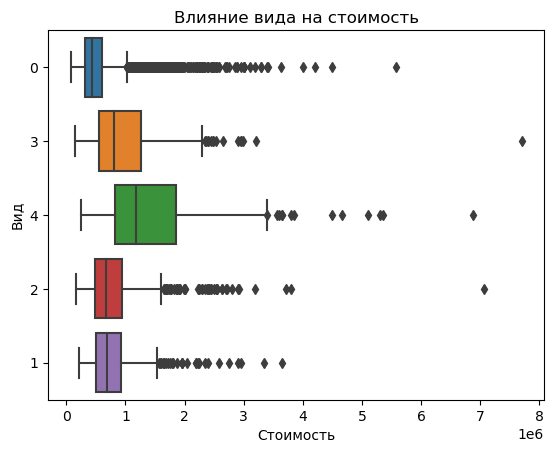

In [38]:
sea.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Вид')
plt.title('Влияние вида на стоимость');

Вывод: дороже всего с оценкой вида 4

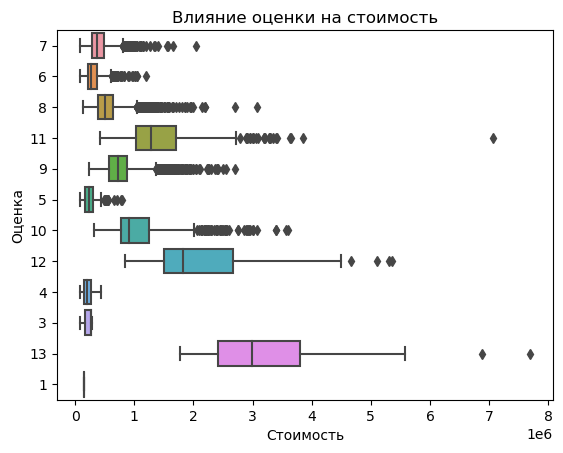

In [42]:
sea.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.6);
plt.xlabel('Стоимость')
plt.ylabel('Оценка')
plt.title('Влияние оценки на стоимость');

Вывод: недвижимость с оценкой 13 имеют наибольшую стоимость